In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [3]:
train_dataset = datasets.ImageFolder(root='../data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset) // 2, shuffle=True)

test_dataset = datasets.ImageFolder(root='../data/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

In [4]:
print('Train dataset size:', len(train_dataset))
print('Test dataset size:', len(test_dataset))
print('Classes:', train_dataset.classes)

Train dataset size: 100000
Test dataset size: 20000
Classes: ['FAKE', 'REAL']


In [5]:
def dataloader_to_np(dataloader):
    for img, label in dataloader:
        return img.numpy().reshape(len(img), -1), label.numpy()

In [6]:
train_img, train_label = dataloader_to_np(train_loader)
test_img, test_label = dataloader_to_np(test_loader)

In [7]:
clf = svm.SVC(gamma='scale')
clf.fit(train_img, train_label)

SVC()

In [8]:
predictions = clf.predict(test_img)
print("Accuracy:", accuracy_score(test_label, predictions))
print("Classification report:")
print(classification_report(test_label, predictions))

Accuracy: 0.83515
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     10000
           1       0.84      0.83      0.84     10000

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



Confusion matrix:
[[8356 1644]
 [1653 8347]]


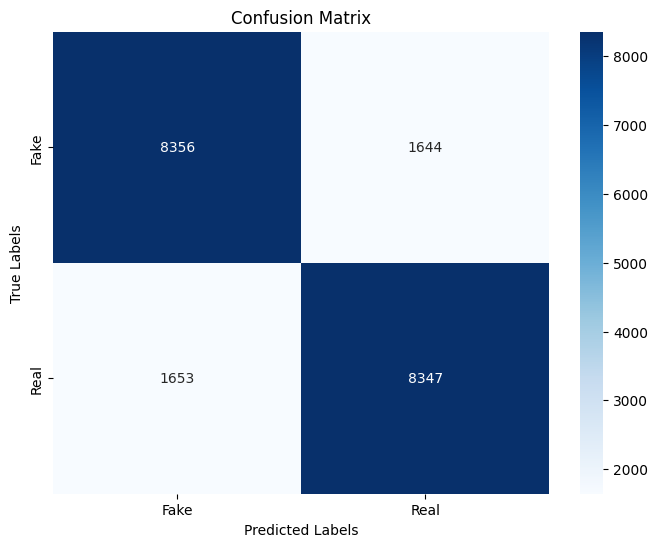

In [10]:
cm = confusion_matrix(test_label, predictions)
print('Confusion matrix:')
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['Fake', 'Real'])
plt.yticks([0.5, 1.5], ['Fake', 'Real'])
plt.show()